In [1]:

import pandas as pd
import numpy as np

In [2]:
# Read both CSVs separately
fake_df = pd.read_csv('Fake.csv', encoding='latin-1')
real_df = pd.read_csv('True.csv', encoding='latin-1')

# Optionally add labels to distinguish them
fake_df["label"] = "Fake_News"
real_df["label"] = "Real_News"

# Combine into one dataframe
df = pd.concat([fake_df, real_df], ignore_index=True)

In [3]:
df.head()

,title,text,subject,date,label
0,Donald Trump Sends Out Embarrassing New Yearâ...,Donald Trump just couldn t wish all Americans ...,News,"December 31, 2017",Fake_News
1,Drunk Bragging Trump Staffer Started Russian ...,House Intelligence Committee Chairman Devin Nu...,News,"December 31, 2017",Fake_News
2,Sheriff David Clarke Becomes An Internet Joke...,"On Friday, it was revealed that former Milwauk...",News,"December 30, 2017",Fake_News
3,Trump Is So Obsessed He Even Has Obamaâs Na...,"On Christmas day, Donald Trump announced that ...",News,"December 29, 2017",Fake_News
4,Pope Francis Just Called Out Donald Trump Dur...,Pope Francis used his annual Christmas Day mes...,News,"December 25, 2017",Fake_News


In [4]:
df.shape

(44898, 5)

In [5]:
df.sample(4)

,title,text,subject,date,label
8237,Watch The Moment A White Teacher Gets SCHOOLE...,A brilliant moment where a high school student...,News,"February 9, 2016",Fake_News
33276,House Republican leader sees Puerto Rico bill ...,WASHINGTON (Reuters) - House of Representative...,politicsNews,"April 26, 2016",Real_News
18461,RATINGS FOR NBCâS Backstabbing Megyn Kelly A...,"Last week, Alex Jones scooped NBC and Megyn Ke...",left-news,"Jun 19, 2017",Fake_News
7571,McDonaldâs Brings Conservativesâ Nightmar...,"Over the past few months, McDonalds has been a...",News,"March 10, 2016",Fake_News


1. Data cleaning
2. EDA
3. Text Preprocessing
4. Model building
5. Evaluation
6. Improvement
7. Website

# Data cleaning

In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 44898 entries, 0 to 44897
Data columns (total 5 columns):
 #   Column   Non-Null Count  Dtype 
---  ------   --------------  ----- 
 0   title    44898 non-null  object
 1   text     44898 non-null  object
 2   subject  44898 non-null  object
 3   date     44898 non-null  object
 4   label    44898 non-null  object
dtypes: object(5)
memory usage: 1.7+ MB


In [6]:
df.isnull().sum()

title      0
text       0
subject    0
date       0
label      0
dtype: int64

In [8]:
df['subject'].value_counts()

subject
politicsNews       11272
worldnews          10145
News                9050
politics            6841
left-news           4459
Government News     1570
US_News              783
Middle-east          778
Name: count, dtype: int64

In [9]:
df['label'].value_counts()

label
Fake_News    23481
Real_News    21417
Name: count, dtype: int64

In [10]:
df.head()#dropping subject and date
df.drop(columns=['subject','date'], inplace=True)

In [11]:
df.head()

,title,text,label
0,Donald Trump Sends Out Embarrassing New Yearâ...,Donald Trump just couldn t wish all Americans ...,Fake_News
1,Drunk Bragging Trump Staffer Started Russian ...,House Intelligence Committee Chairman Devin Nu...,Fake_News
2,Sheriff David Clarke Becomes An Internet Joke...,"On Friday, it was revealed that former Milwauk...",Fake_News
3,Trump Is So Obsessed He Even Has Obamaâs Na...,"On Christmas day, Donald Trump announced that ...",Fake_News
4,Pope Francis Just Called Out Donald Trump Dur...,Pope Francis used his annual Christmas Day mes...,Fake_News


In [12]:
# # renaming the cols
df = df.rename(columns={'label':'target'})
df['news'] = df['title'] + ' '+ df['text']
df.sample(5)

,title,text,target,news
15441,OBAMAâS DREAM TEAM: ILLEGAL ALIEN DRUG DEALE...,This news comes on the heels of Obama s relea...,Fake_News,OBAMAâS DREAM TEAM: ILLEGAL ALIEN DRUG DEALE...
17394,DOJ MONITORS PATRIOT GUN-RANGE OWNER Who Banne...,I will close my business before I will make a...,Fake_News,DOJ MONITORS PATRIOT GUN-RANGE OWNER Who Banne...
44833,Thai immigration police chief says no informat...,BANGKOK (Reuters) - The head of Thailand s imm...,Real_News,Thai immigration police chief says no informat...
25481,Tillerson says U.S. will keep up 'peaceful pre...,WASHINGTON (Reuters) - U.S. Secretary of State...,Real_News,Tillerson says U.S. will keep up 'peaceful pre...
37392,Police arrest Kosovo opposition leader for no-...,PRISTINA (Reuters) - Kosovo police arrested th...,Real_News,Police arrest Kosovo opposition leader for no-...


In [13]:

df.drop(columns=['title','text'], inplace=True)
df.head()

,target,news
0,Fake_News,Donald Trump Sends Out Embarrassing New Yearâ...
1,Fake_News,Drunk Bragging Trump Staffer Started Russian ...
2,Fake_News,Sheriff David Clarke Becomes An Internet Joke...
3,Fake_News,Trump Is So Obsessed He Even Has Obamaâs Na...
4,Fake_News,Pope Francis Just Called Out Donald Trump Dur...


In [14]:
df['target'].value_counts()

target
Fake_News    23481
Real_News    21417
Name: count, dtype: int64

In [15]:
from sklearn.preprocessing import LabelEncoder
encoder = LabelEncoder()

In [16]:
df.head()

,target,news
0,Fake_News,Donald Trump Sends Out Embarrassing New Yearâ...
1,Fake_News,Drunk Bragging Trump Staffer Started Russian ...
2,Fake_News,Sheriff David Clarke Becomes An Internet Joke...
3,Fake_News,Trump Is So Obsessed He Even Has Obamaâs Na...
4,Fake_News,Pope Francis Just Called Out Donald Trump Dur...


In [17]:
encoder.fit_transform(df['target'])

array([0, 0, 0, ..., 1, 1, 1], shape=(44898,))

In [18]:
df['target'] = encoder.fit_transform(df['target'])

In [19]:
df.head()

,target,news
0,0,Donald Trump Sends Out Embarrassing New Yearâ...
1,0,Drunk Bragging Trump Staffer Started Russian ...
2,0,Sheriff David Clarke Becomes An Internet Joke...
3,0,Trump Is So Obsessed He Even Has Obamaâs Na...
4,0,Pope Francis Just Called Out Donald Trump Dur...


In [20]:
# missing values
df.isnull().sum()

target    0
news      0
dtype: int64

In [21]:
df.isna().sum()

target    0
news      0
dtype: int64

In [22]:
# check for duplicate values
df.duplicated().sum()

np.int64(5793)

In [23]:
# remove duplicates
df = df.drop_duplicates(keep='first')

In [24]:
df.duplicated().sum()

np.int64(0)

In [25]:
df.shape

(39105, 2)

In [26]:
df.head()

,target,news
0,0,Donald Trump Sends Out Embarrassing New Yearâ...
1,0,Drunk Bragging Trump Staffer Started Russian ...
2,0,Sheriff David Clarke Becomes An Internet Joke...
3,0,Trump Is So Obsessed He Even Has Obamaâs Na...
4,0,Pope Francis Just Called Out Donald Trump Dur...


# EDA

In [27]:
df['target'].value_counts()

target
1    21197
0    17908
Name: count, dtype: int64

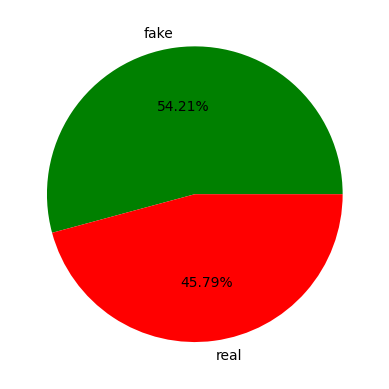

In [28]:
import matplotlib.pyplot as plt
plt.pie(df['target'].value_counts(), labels=['fake','real'],autopct="%.2f%%",colors=['green','red'])
plt.show()

In [29]:
# Check target distribution
print(df["target"].value_counts(normalize=True) * 100)

target
1    54.205345
0    45.794655
Name: proportion, dtype: float64


Dataset is balanced

In [37]:
import nltk
nltk.download('all')

[nltk_data] Downloading collection 'all'
[nltk_data]    | 
[nltk_data]    | Downloading package abc to
[nltk_data]    |     C:\Users\indra\AppData\Roaming\nltk_data...
[nltk_data]    |   Unzipping corpora\abc.zip.
[nltk_data]    | Downloading package alpino to
[nltk_data]    |     C:\Users\indra\AppData\Roaming\nltk_data...
[nltk_data]    |   Unzipping corpora\alpino.zip.
[nltk_data]    | Downloading package averaged_perceptron_tagger to
[nltk_data]    |     C:\Users\indra\AppData\Roaming\nltk_data...
[nltk_data]    |   Unzipping taggers\averaged_perceptron_tagger.zip.
[nltk_data]    | Downloading package averaged_perceptron_tagger_eng to
[nltk_data]    |     C:\Users\indra\AppData\Roaming\nltk_data...
[nltk_data]    |   Unzipping
[nltk_data]    |       taggers\averaged_perceptron_tagger_eng.zip.
[nltk_data]    | Downloading package averaged_perceptron_tagger_ru to
[nltk_data]    |     C:\Users\indra\AppData\Roaming\nltk_data...
[nltk_data]    |   Unzipping
[nltk_data]    |       tagge

True

In [30]:
import nltk

In [31]:
df['news'][2]

' Sheriff David Clarke Becomes An Internet Joke For Threatening To Poke People â\x80\x98In The Eyeâ\x80\x99 On Friday, it was revealed that former Milwaukee Sheriff David Clarke, who was being considered for Homeland Security Secretary in Donald Trump s administration, has an email scandal of his own.In January, there was a brief run-in on a plane between Clarke and fellow passenger Dan Black, who he later had detained by the police for no reason whatsoever, except that maybe his feelings were hurt. Clarke messaged the police to stop Black after he deplaned, and now, a search warrant has been executed by the FBI to see the exchanges.Clarke is calling it fake news even though copies of the search warrant are on the Internet. I am UNINTIMIDATED by lib media attempts to smear and discredit me with their FAKE NEWS reports designed to silence me,  the former sheriff tweeted.  I will continue to poke them in the eye with a sharp stick and bitch slap these scum bags til they get it. I have be

In [50]:
df['num_characters'] = df['news'].apply(len)
df.head()

,target,news,num_characters
0,0,Donald Trump Sends Out Embarrassing New Yearâ...,2975
1,0,Drunk Bragging Trump Staffer Started Russian ...,1968
2,0,Sheriff David Clarke Becomes An Internet Joke...,3692
3,0,Trump Is So Obsessed He Even Has Obamaâs Na...,2855
4,0,Pope Francis Just Called Out Donald Trump Dur...,2417


In [ ]:
df['news'].apply(lambda x : len(nltk.word_tokenize(x)))


In [43]:
df['num_words'] = df['news'].apply(lambda x: len(nltk.word_tokenize(x)))
df.head()

,target,news,num_words,num_sentences,num_characters
0,0,Donald Trump Sends Out Embarrassing New Yearâ...,612,28,2975
1,0,Drunk Bragging Trump Staffer Started Russian ...,339,11,1968
2,0,Sheriff David Clarke Becomes An Internet Joke...,704,25,3692
3,0,Trump Is So Obsessed He Even Has Obamaâs Na...,535,15,2855
4,0,Pope Francis Just Called Out Donald Trump Dur...,469,19,2417


In [44]:
df['num_sentences'] = df['news'].apply(lambda x:len(nltk.sent_tokenize(x)))
df.head()

,target,news,num_words,num_sentences,num_characters
0,0,Donald Trump Sends Out Embarrassing New Yearâ...,612,28,2975
1,0,Drunk Bragging Trump Staffer Started Russian ...,339,11,1968
2,0,Sheriff David Clarke Becomes An Internet Joke...,704,25,3692
3,0,Trump Is So Obsessed He Even Has Obamaâs Na...,535,15,2855
4,0,Pope Francis Just Called Out Donald Trump Dur...,469,19,2417


In [45]:
df['num_sentences'].value_counts()

num_sentences
3      2237
2      2193
14     1859
13     1813
12     1786
       ... 
127       1
177       1
93        1
150       1
121       1
Name: count, Length: 140, dtype: int64

In [37]:
import seaborn as sns

<Axes: >

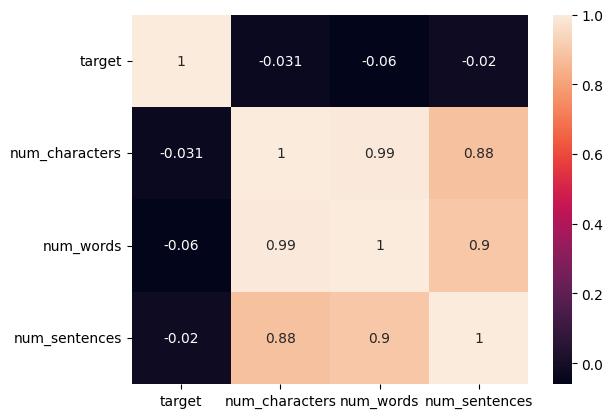

In [41]:
sns.heatmap(df.corr(numeric_only=True),annot=True)

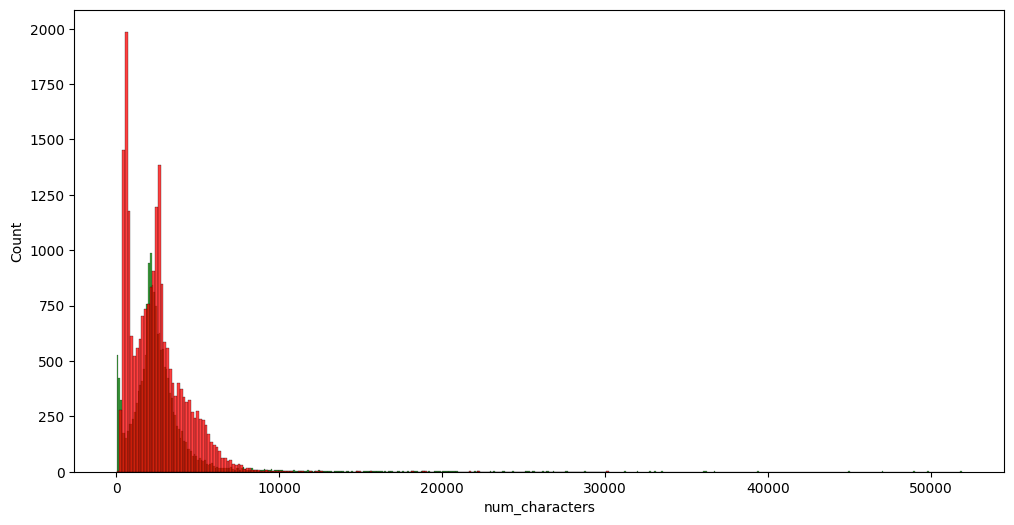

In [39]:
plt.figure(figsize=(12,6))
sns.histplot(df[df['target'] == 0]['num_characters'],color='green')
sns.histplot(df[df['target'] == 1]['num_characters'],color='red')
plt.show()

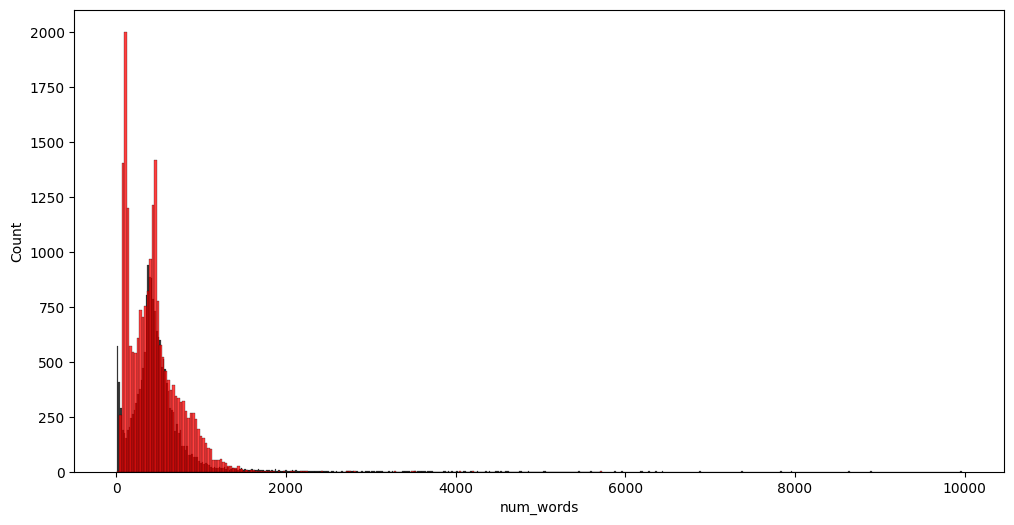

In [40]:
plt.figure(figsize=(12,6))
sns.histplot(df[df['target'] == 0]['num_words'], color='black')
sns.histplot(df[df['target'] == 1]['num_words'],color='red')
plt.show()

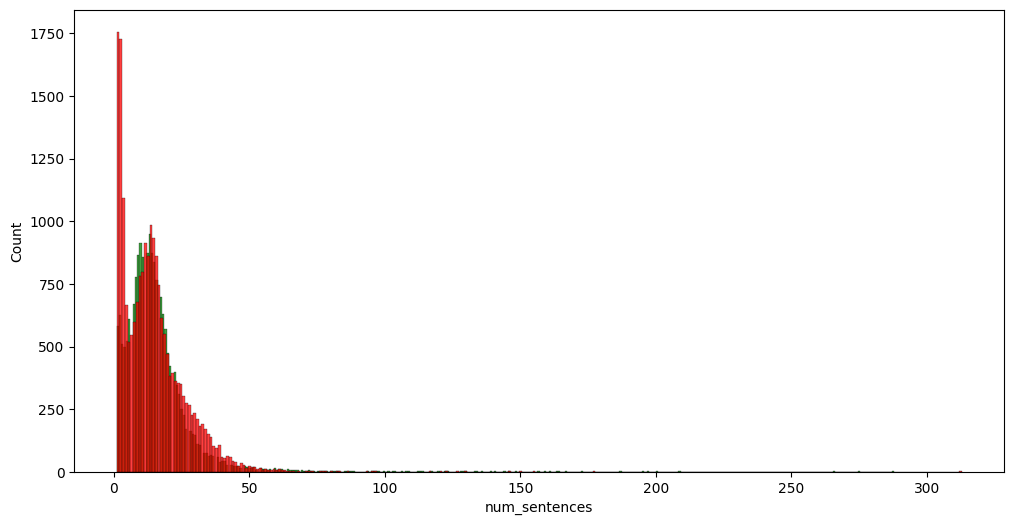

In [41]:
plt.figure(figsize=(12,6))
sns.histplot(df[df['target'] == 0]['num_sentences'],color='green')
sns.histplot(df[df['target'] == 1]['num_sentences'],color='red')
plt.show()

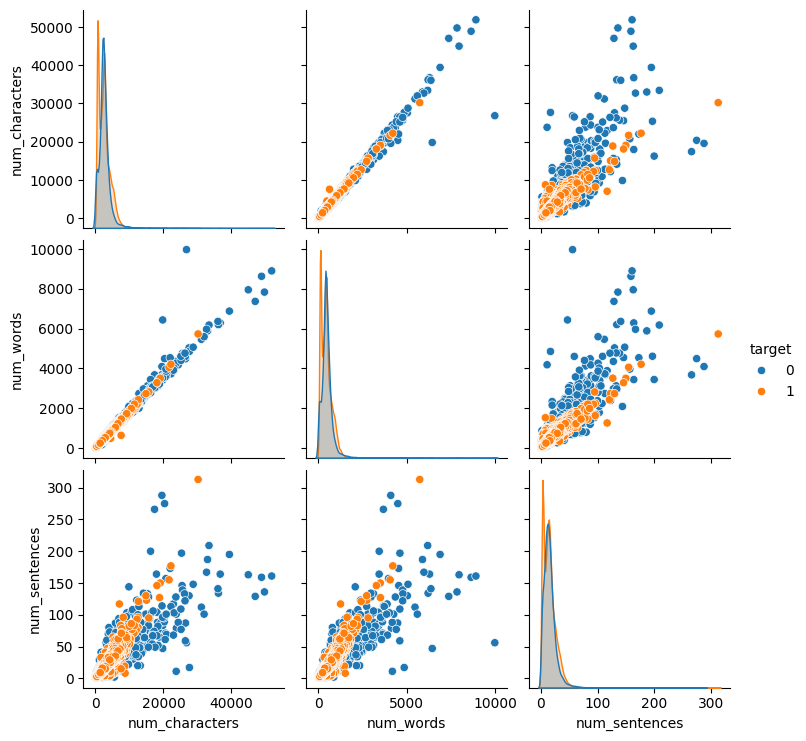

In [42]:
sns.pairplot(df,hue='target')
plt.show()

<Axes: >

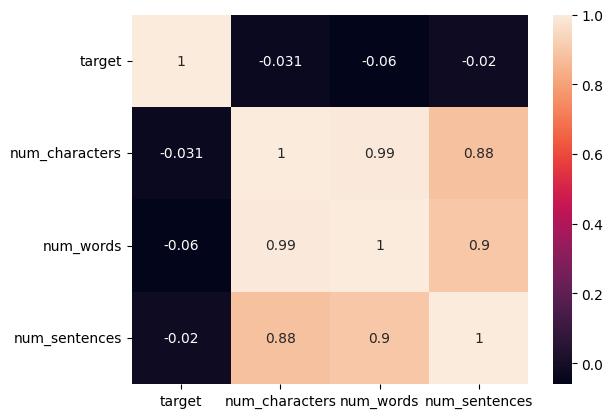

In [43]:
sns.heatmap(df.corr(numeric_only=True),annot=True)

In [48]:
df.drop(columns=['num_characters','num_sentences','num_words'],inplace=True)

KeyError: "['num_characters', 'num_sentences', 'num_words'] not found in axis"

In [48]:
df.head()

,target,news
0,0,Donald Trump Sends Out Embarrassing New Yearâ...
1,0,Drunk Bragging Trump Staffer Started Russian ...
2,0,Sheriff David Clarke Becomes An Internet Joke...
3,0,Trump Is So Obsessed He Even Has Obamaâs Na...
4,0,Pope Francis Just Called Out Donald Trump Dur...


# 3. Data Preprocessing
- Lower case
- Tokenization
- Removing special characters
- Removing stop words and punctuation
- Stemming

In [49]:
from nltk.corpus import stopwords
import string
string.punctuation
from nltk.stem.snowball import SnowballStemmer
snow = SnowballStemmer('english')

In [50]:
import nltk
nltk.download('stopwords')
nltk.download('punkt')

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\indra\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\indra\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!


True

In [51]:
# Initialize the PorterStemmer

from nltk.stem.porter import PorterStemmer
ps = PorterStemmer()


def transform_text(text):
    text = text.lower()  # Convert to lowercase
    text = nltk.word_tokenize(text)  # Tokenize the text make a list of words
    
    y = []  # Removing special characters
    for i in text:
        if i.isalnum():
            y.append(i)
    
    text = y[:]
    y.clear()
    
    for i in text:  # Remove stopwords and punctuation
        if i not in stopwords.words('english') and i not in string.punctuation:
            y.append(i)
            
    text = y[:]
    y.clear()
    
    for i in text:  # Apply stemming
        y.append(ps.stem(i))
    
    return " ".join(y)

In [52]:
df['news'][25]

' Despicable Trump Suggests Female Senator Would â\x80\x98Do Anythingâ\x80\x99 With Him For Campaign Money (TWEET) Donald Trump is afraid of strong, powerful women. He is a horrific misogynist, and has shown himself to be so over and over again. That is nothing new. He has mocked the weight of a beauty queen, made repeated suggestions about women s menstrual cycles, and had repeatedly called women who accuse men   including himself   of sexual harassment and sexual assault of being liars and threatened to sue him. Now, he has gone even lower with an attack on Democratic Senator Kirsten Gillibrand (NY).In an early morning tweet, Trump actually suggested that Senator Gillibrand would have sex with him for campaign money. No, I m not kidding. Here is the tweet:Lightweight Senator Kirsten Gillibrand, a total flunky for Chuck Schumer and someone who would come to my office  begging  for campaign contributions not so long ago (and would do anything for them), is now in the ring fighting agai

In [45]:
transform_text('I am Indra Jaiswal!,is and .')

'indra jaiswal'

In [53]:
transform_text(' Despicable Trump Suggests Female Senator Would â\x80\x98Do Anythingâ\x80\x99 With Him For Campaign Money (TWEET) Donald Trump is afraid of strong, powerful women. He is a horrific misogynist, and has shown himself to be so over and over again. That is nothing new. He has mocked the weight of a beauty queen, made repeated suggestions about women s menstrual cycles, and had repeatedly called women who accuse men   including himself   of sexual harassment and sexual assault of being liars and threatened to sue him. Now, he has gone even lower with an attack on Democratic Senator Kirsten Gillibrand (NY).In an early morning tweet, Trump actually suggested that Senator Gillibrand would have sex with him for campaign money. No, I m not kidding. Here is the tweet:Lightweight Senator Kirsten Gillibrand, a total flunky for Chuck Schumer and someone who would come to my office  begging  for campaign contributions not so long ago (and would do anything for them), is now in the ring fighting against Trump. Very disloyal to Bill & Crooked-USED!  Donald J. Trump (@realDonaldTrump) December 12, 2017For one thing, I don t think Kirsten Gillibrand has to beg the likes of Donald Trump for anything, and she certainly would not stoop anywhere near doing what Trump is suggesting for campaign money. Think about this, folks: the sitting  president  is actually saying that a sitting Senator offered him sex in exchange for campaign money. That is truly beyond the pale. We already knew that Donald Trump was a sexist asshole, but this is a new low, even for him.General Kelly, General McMaster, and whomever else is running that White House   DO SOMETHING about this fool s Twitter habit. It is way out of control, and he does great damage to the nation with ever 140 280 character outburst. This is outrageous. Forget the fact that the orange overlord is currently squatting in the Oval Office   no adult, period, should be acting like this.In this watershed  Me Too  moment in America, it is time to call out the Sexist-in-Chief for what he is   a complete misogynist who has no respect for women and never has. Ivanka, Melania, Sarah Huckabee Sanders, Hope Hicks, and all the other women in Trump s orbit need to step up and say that there s been more than enough. Curtail this man s sexist behavior, or turn in your woman card. Every last one of you.Featured image via Alex Wong/Getty Images')

'despic trump suggest femal senat would campaign money tweet donald trump afraid strong power women horrif misogynist shown noth new mock weight beauti queen made repeat suggest women menstrual cycl repeatedli call women accus men includ sexual harass sexual assault liar threaten sue gone even lower attack democrat senat kirsten gillibrand ny earli morn tweet trump actual suggest senat gillibrand would sex campaign money kid tweet lightweight senat kirsten gillibrand total flunki chuck schumer someon would come offic beg campaign contribut long ago would anyth ring fight trump disloy bill donald trump realdonaldtrump decemb 12 2017for one thing think kirsten gillibrand beg like donald trump anyth certainli would stoop anywher near trump suggest campaign money think folk sit presid actual say sit senat offer sex exchang campaign money truli beyond pale alreadi knew donald trump sexist asshol new low even kelli gener mcmaster whomev els run white hous someth fool twitter habit way contro

In [54]:
df['news']

0         Donald Trump Sends Out Embarrassing New Yearâ...
1         Drunk Bragging Trump Staffer Started Russian ...
2         Sheriff David Clarke Becomes An Internet Joke...
3         Trump Is So Obsessed He Even Has Obamaâs Na...
4         Pope Francis Just Called Out Donald Trump Dur...
                               ...                        
44893    'Fully committed' NATO backs new U.S. approach...
44894    LexisNexis withdrew two products from Chinese ...
44895    Minsk cultural hub becomes haven from authorit...
44896    Vatican upbeat on possibility of Pope Francis ...
44897    Indonesia to buy $1.14 billion worth of Russia...
Name: news, Length: 39105, dtype: object

In [ ]:
df['transform_news'] = df['news'].apply(transform_text)

In [47]:
from wordcloud import WordCloud
wc = WordCloud(width=500,height=500,min_font_size=10,background_color='white')

In [ ]:
df[df['target'] == 1]['transform_news']

In [ ]:
fakenews_wc = wc.generate(df[df['target'] == 1]['transform_text'].str.cat(sep=" "))

In [ ]:
df[df['target'] == 1]['transform_text'].str.cat(sep=" ")

In [ ]:
plt.figure(figsize=(15,6))
plt.imshow(spam_wc)

In [ ]:
realnews_wc = wc.generate(df[df['target'] == 0]['transformed_text'].str.cat(sep=" "))

In [ ]:
plt.figure(figsize=(15,6))
plt.imshow(ham_wc)